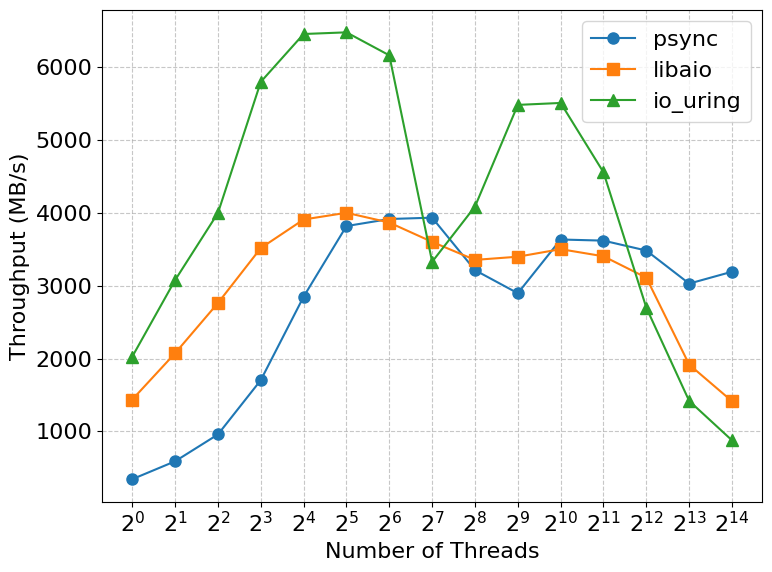

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = ['Times New Roman']

plt.rcParams['text.usetex'] = False       # 不用外部 LaTeX
plt.rcParams['lines.markersize'] = 8 
plt.rcParams['font.size'] = 16

def load_data(mode,threads):
    res = []
    for thread in threads:
        with open(f"results/{mode}_{thread}.txt") as f:
            total = 0
            cnt = 0
            data = f.readlines()
            for i,line in enumerate(data):
                throughput = float(line.split("=")[1][:-1])
                total += throughput
                    
            res.append(total/len(data))
    return res

threads = [1,2,4,8,16,32,64,128,256,512,1024,2048,4096,8192,16384]
psync = load_data("psync",threads)
libaio = load_data("libaio",threads)
io_uring = load_data("io_uring",threads)

plt.figure(figsize=(8,6))

plt.plot(threads, psync, marker='o', label="psync")
plt.plot(threads, libaio, marker='s', label="libaio")
plt.plot(threads, io_uring, marker='^', label="io_uring")

plt.xlabel("Number of Threads")
plt.ylabel("Throughput (MB/s)")  
# plt.title("I/O Scalability with Different Strategies")
plt.xscale("log", base=2)   
plt.xticks(threads)         
plt.grid(True, which="both", linestyle="--", alpha=0.7)
plt.legend()

plt.tight_layout()
plt.savefig("io_bench_results.pdf")
plt.show()